In [2]:
# import necessary libraries and specify that graphs should be plotted inline
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install linearmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.8 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/projecteco/')

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
df = pd.read_csv('pollution_us_2000_2016.csv')

In [7]:
df.rename(columns={'Unnamed: 0': 'RowNumber'}, inplace=True)

In [8]:
df.head()

,RowNumber,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.000,21,13.000,Parts per million,1.146,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.000,21,13.000,Parts per million,0.879,2.200,23,25.000
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975,6.600,23,NaN,Parts per million,1.146,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975,6.600,23,NaN,Parts per million,0.879,2.200,23,25.000
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958,3.000,22,4.000,Parts per million,0.850,1.600,23,NaN


In [9]:
df.tail()

,RowNumber,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000,0.000,2,NaN,Parts per million,0.092,0.100,2,1.000
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.023,0.000,0,0.000,Parts per million,0.068,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.023,0.000,0,0.000,Parts per million,0.100,0.100,0,1.000
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000,0.000,5,NaN,Parts per million,0.068,0.127,0,NaN
1746660,24603,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000,0.000,5,NaN,Parts per million,0.100,0.100,0,1.000


In [10]:
df.describe()

,RowNumber,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,1746661.000,873754.000,1746661.000,1746661.000,1746661.000,873338.000
mean,54714.137,22.309,71.694,1118.214,12.822,25.415,11.731,23.898,0.026,0.039,10.171,36.050,1.870,4.492,9.665,7.116,0.368,0.620,7.875,5.997
std,33729.076,17.256,79.480,2003.103,9.505,16.000,7.878,15.163,0.011,0.015,4.003,19.780,2.760,7.680,6.731,11.937,0.314,0.644,7.979,5.852
min,0.000,1.000,1.000,1.000,-2.000,-2.000,0.000,0.000,0.000,0.000,0.000,0.000,-2.000,-2.000,0.000,0.000,-0.438,-0.400,0.000,0.000
25%,25753.000,6.000,17.000,9.000,5.750,13.000,5.000,12.000,0.018,0.029,9.000,25.000,0.257,0.800,5.000,1.000,0.183,0.292,0.000,2.000
50%,53045.000,17.000,59.000,60.000,10.739,24.000,9.000,23.000,0.026,0.038,10.000,33.000,0.988,2.000,8.000,3.000,0.293,0.400,6.000,5.000
75%,80336.000,40.000,97.000,1039.000,17.714,35.700,20.000,33.000,0.034,0.048,11.000,42.000,2.325,5.000,14.000,9.000,0.467,0.800,13.000,8.000
max,134575.000,80.000,650.000,9997.000,139.542,267.000,23.000,132.000,0.095,0.141,23.000,218.000,321.625,351.000,23.000,200.000,7.508,19.900,23.000,201.000


In [11]:
df.isnull().sum()

RowNumber                 0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [12]:
df.columns

Index(['RowNumber', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [13]:
df= df[['State', 'Date Local', 'NO2 Mean', 'NO2 AQI','O3 AQI',
       'SO2 Mean', 'SO2 AQI', 'CO Mean', 'CO AQI']]

In [14]:
df

,State,Date Local,NO2 Mean,NO2 AQI,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.042,46,34,3.000,13.000,1.146,NaN
1,Arizona,2000-01-01,19.042,46,34,3.000,13.000,0.879,25.000
2,Arizona,2000-01-01,19.042,46,34,2.975,NaN,1.146,NaN
3,Arizona,2000-01-01,19.042,46,34,2.975,NaN,0.879,25.000
4,Arizona,2000-01-02,22.958,34,27,1.958,4.000,0.850,NaN
...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,2016-03-30,1.083,1,44,0.000,NaN,0.092,1.000
1746657,Wyoming,2016-03-31,0.939,1,44,-0.023,0.000,0.068,NaN
1746658,Wyoming,2016-03-31,0.939,1,44,-0.023,0.000,0.100,1.000
1746659,Wyoming,2016-03-31,0.939,1,44,0.000,NaN,0.068,NaN


In [15]:
df.dropna(inplace = True)

(array([3.95441e+05, 2.92590e+04, 7.80700e+03, 2.62100e+03, 9.70000e+02,
        6.18000e+02, 1.13000e+02, 2.90000e+01, 1.40000e+01, 4.00000e+00]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

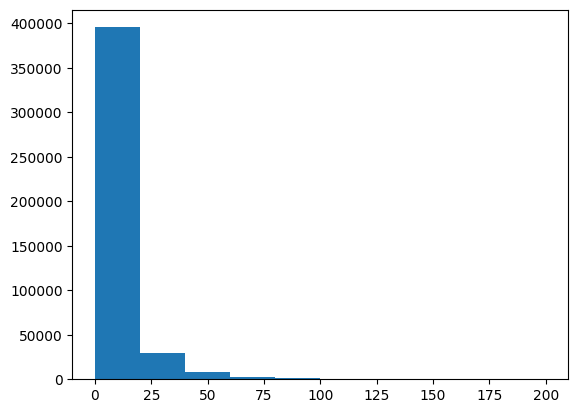

In [16]:
#plt.hist(df['SO2 AQI'])

(array([4.25636e+05, 9.91800e+03, 1.11300e+03, 1.50000e+02, 3.60000e+01,
        1.10000e+01, 6.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([  0. ,  20.1,  40.2,  60.3,  80.4, 100.5, 120.6, 140.7, 160.8,
        180.9, 201. ]),
 <BarContainer object of 10 artists>)

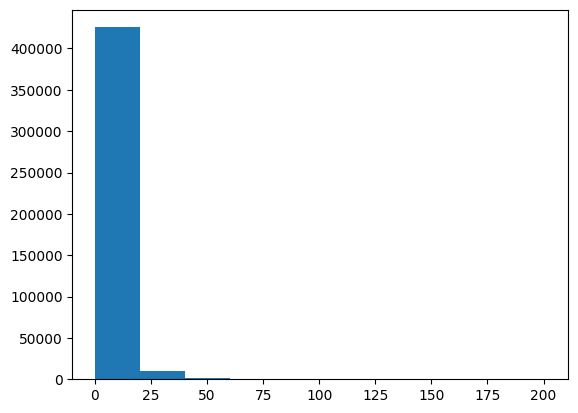

In [17]:
#plt.hist(df['CO AQI'])

### Imputing the null values

In [ ]:
#df[df['SO2 AQI'].isnull()] = df['SO2 AQI'].median()

In [ ]:
#df[df['CO AQI'].isnull()] = df['CO AQI'].median()

In [ ]:
#df.isnull().sum()

RowNumber            0
State Code           0
County Code          0
Site Num             0
Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Units            0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Units             0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Units            0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Units             0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

# Correlarion Analysis

In [129]:
corr_df = df.corr()

In [130]:
corr_df

,NO2 Mean,NO2 AQI,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
NO2 Mean,1.000,0.961,-0.516,0.709,0.609,0.908,0.901
NO2 AQI,0.961,1.000,-0.368,0.736,0.671,0.838,0.835
O3 AQI,-0.516,-0.368,1.000,-0.078,0.081,-0.547,-0.573
SO2 Mean,0.709,0.736,-0.078,1.000,0.955,0.667,0.647
SO2 AQI,0.609,0.671,0.081,0.955,1.000,0.541,0.520
CO Mean,0.908,0.838,-0.547,0.667,0.541,1.000,0.991
CO AQI,0.901,0.835,-0.573,0.647,0.520,0.991,1.000


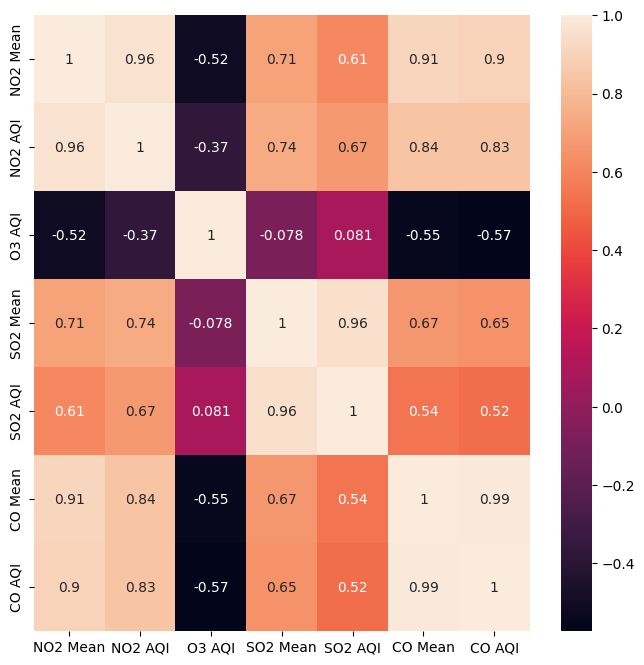

In [131]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_df, annot=True, ax=ax)
plt.show()

In [28]:
df.columns

Index(['State', 'City', 'Date Local', 'NO2 Mean', 'NO2 AQI', 'O3 AQI',
       'SO2 Mean', 'SO2 AQI', 'CO Mean', 'CO AQI'],
      dtype='object')

In [29]:
df['Date Local'] = pd.to_datetime(df['Date Local'])

In [30]:
df=df[df['State'] != 'Country Of Mexico']

In [31]:
df['State'].unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [32]:
#df = df[df['State'].isin(['New Jersey', 'Arizona', 'Massachusetts', 'Colorado' ])]

In [33]:
df

,State,City,Date Local,NO2 Mean,NO2 AQI,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
1,Arizona,Phoenix,2000-01-01,19.042,46,34,3.000,13.000,0.879,25.000
5,Arizona,Phoenix,2000-01-02,22.958,34,27,1.958,4.000,1.067,26.000
9,Arizona,Phoenix,2000-01-03,38.125,48,14,5.250,16.000,1.762,28.000
13,Arizona,Phoenix,2000-01-04,40.261,72,28,7.083,23.000,1.829,34.000
17,Arizona,Phoenix,2000-01-05,48.450,58,10,8.708,21.000,2.700,42.000
...,...,...,...,...,...,...,...,...,...,...
1736812,Massachusetts,Boston,2016-03-27,10.542,26,32,0.508,0.000,0.229,3.000
1736816,Massachusetts,Boston,2016-03-28,17.000,24,27,1.017,1.000,0.258,3.000
1736820,Massachusetts,Boston,2016-03-29,7.538,9,34,1.004,1.000,0.208,3.000
1736824,Massachusetts,Boston,2016-03-30,14.833,39,41,0.821,1.000,0.233,3.000


In [34]:
df.columns

Index(['State', 'City', 'Date Local', 'NO2 Mean', 'NO2 AQI', 'O3 AQI',
       'SO2 Mean', 'SO2 AQI', 'CO Mean', 'CO AQI'],
      dtype='object')

In [35]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Sample data (replace this with your actual data)
var = ['NO2 Mean', 'NO2 AQI','O3 AQI',
       'SO2 Mean', 'SO2 AQI', 'CO Mean', 'CO AQI']

df_X = df[var]

# Calculate VIF for each variable
def calculate_vif(data_frame):
    variables = data_frame.values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(df_X)

# Display the VIF results
print(vif_results)


   Variable    VIF
0  NO2 Mean 28.387
1   NO2 AQI 31.099
2    O3 AQI  3.679
3  SO2 Mean  4.800
4   SO2 AQI  4.138
5   CO Mean 26.528
6    CO AQI 21.205


# Causal Analysis

In [16]:
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d')

In [17]:
df = df[df['Date Local'].dt.year >= 2000]

In [18]:
df = df.groupby(['Date Local']).mean()

In [19]:
yo =  df['O3 AQI'].resample('M').mean()
yn =  df['NO2 AQI'].resample('M').mean()
ys =  df['SO2 AQI'].resample('M').mean()
yc =  df['CO AQI'].resample('M').mean()

In [20]:
yn_mean =  df['NO2 Mean'].resample('M').mean()
ys_mean =  df['SO2 Mean'].resample('M').mean()
yc_mean =  df['CO Mean'].resample('M').mean()

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [22]:
test_stationarity(yo)

Results of Dickey-Fuller Test:
Test Statistic                 -1.815
p-value                         0.373
#Lags Used                     11.000
Number of Observations Used   185.000
Critical Value (1%)            -3.466
Critical Value (5%)            -2.877
Critical Value (10%)           -2.575
dtype: float64


In [23]:
yo_diff = yo.diff().dropna()

In [24]:
test_stationarity(yo_diff)

Results of Dickey-Fuller Test:
Test Statistic                -13.151
p-value                         0.000
#Lags Used                     10.000
Number of Observations Used   185.000
Critical Value (1%)            -3.466
Critical Value (5%)            -2.877
Critical Value (10%)           -2.575
dtype: float64


In [25]:
test_stationarity(yn)

Results of Dickey-Fuller Test:
Test Statistic                 -0.642
p-value                         0.861
#Lags Used                     15.000
Number of Observations Used   181.000
Critical Value (1%)            -3.467
Critical Value (5%)            -2.878
Critical Value (10%)           -2.575
dtype: float64


In [26]:
yn_diff = yn.diff().dropna()

In [27]:
test_stationarity(yn_diff)

Results of Dickey-Fuller Test:
Test Statistic                 -3.958
p-value                         0.002
#Lags Used                     14.000
Number of Observations Used   181.000
Critical Value (1%)            -3.467
Critical Value (5%)            -2.878
Critical Value (10%)           -2.575
dtype: float64


In [28]:
test_stationarity(ys)

Results of Dickey-Fuller Test:
Test Statistic                 -1.228
p-value                         0.661
#Lags Used                     12.000
Number of Observations Used   184.000
Critical Value (1%)            -3.466
Critical Value (5%)            -2.877
Critical Value (10%)           -2.575
dtype: float64


In [29]:
ys_diff = ys.diff().dropna()
test_stationarity(ys_diff)

Results of Dickey-Fuller Test:
Test Statistic                 -6.535
p-value                         0.000
#Lags Used                     11.000
Number of Observations Used   184.000
Critical Value (1%)            -3.466
Critical Value (5%)            -2.877
Critical Value (10%)           -2.575
dtype: float64


In [30]:
test_stationarity(yc)

Results of Dickey-Fuller Test:
Test Statistic                 -1.870
p-value                         0.346
#Lags Used                     15.000
Number of Observations Used   181.000
Critical Value (1%)            -3.467
Critical Value (5%)            -2.878
Critical Value (10%)           -2.575
dtype: float64


In [31]:
yc_diff = yc.diff().dropna()

In [32]:
test_stationarity(yc_diff)

Results of Dickey-Fuller Test:
Test Statistic                 -3.639
p-value                         0.005
#Lags Used                     14.000
Number of Observations Used   181.000
Critical Value (1%)            -3.467
Critical Value (5%)            -2.878
Critical Value (10%)           -2.575
dtype: float64


In [33]:
test_stationarity(yn_mean)
test_stationarity(ys_mean)
test_stationarity(yc_mean)

Results of Dickey-Fuller Test:
Test Statistic                 -0.659
p-value                         0.857
#Lags Used                     15.000
Number of Observations Used   181.000
Critical Value (1%)            -3.467
Critical Value (5%)            -2.878
Critical Value (10%)           -2.575
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -1.504
p-value                         0.532
#Lags Used                     12.000
Number of Observations Used   184.000
Critical Value (1%)            -3.466
Critical Value (5%)            -2.877
Critical Value (10%)           -2.575
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -1.705
p-value                         0.429
#Lags Used                     15.000
Number of Observations Used   181.000
Critical Value (1%)            -3.467
Critical Value (5%)            -2.878
Critical Value (10%)           -2.575
dtype: float64


In [34]:
ys_mean_diff = ys_mean.diff().dropna()
yn_mean_diff = yn_mean.diff().dropna()
yc_mean_diff = yc_mean.diff().dropna()

In [35]:
test_stationarity(yn_mean_diff)
test_stationarity(ys_mean_diff)
test_stationarity(yc_mean_diff)

Results of Dickey-Fuller Test:
Test Statistic                 -3.869
p-value                         0.002
#Lags Used                     14.000
Number of Observations Used   181.000
Critical Value (1%)            -3.467
Critical Value (5%)            -2.878
Critical Value (10%)           -2.575
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -6.392
p-value                         0.000
#Lags Used                     11.000
Number of Observations Used   184.000
Critical Value (1%)            -3.466
Critical Value (5%)            -2.877
Critical Value (10%)           -2.575
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -3.589
p-value                         0.006
#Lags Used                     14.000
Number of Observations Used   181.000
Critical Value (1%)            -3.467
Critical Value (5%)            -2.878
Critical Value (10%)           -2.575
dtype: float64


In [36]:
import statsmodels.api as sm

# Assuming df contains the DataFrame with your data
# X contains the independent variables, and y contains the dependent variable
X = pd.DataFrame({'yn_mean_diff': yn_mean_diff,'ys_mean_diff': ys_mean_diff, 'yc_mean_diff': yc_mean_diff,'yn_diff': yn_diff, 'ys_diff': ys, 'yc_diff': yc_diff})
y = pd.DataFrame({'yo_diff': yo_diff})

X['ys_yc_interaction'] = X['ys_diff'] * X['yc_diff']
X['ys_yn_interaction'] = X['ys_diff'] * X['yn_diff']
X['yn_yc_interaction'] = X['yn_diff'] * X['yc_diff']
X['yn_yc_mean_interaction'] = X['yn_mean_diff'] * X['yc_mean_diff']
X['yn_ys_mean_interaction'] = X['yn_mean_diff'] * X['ys_mean_diff']
X['ys_yc_mean_interaction'] = X['ys_mean_diff'] * X['yc_mean_diff']

# Drop rows with missing values
df_cleaned = pd.concat([X, y], axis=1).dropna()

# Separate X and y after handling missing values
X_cleaned = df_cleaned[['yn_mean_diff', 'yc_mean_diff', 'yn_diff', 'yc_diff'  ]]
y_cleaned = df_cleaned['yo_diff']

# Add a constant term to the independent variables
X_cleaned = sm.add_constant(X_cleaned)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y_cleaned, X_cleaned).fit()

# Print a summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                yo_diff   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     70.36
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.59e-36
Time:                        15:38:34   Log-Likelihood:                -526.41
No. Observations:                 196   AIC:                             1063.
Df Residuals:                     191   BIC:                             1079.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0082      0.257     -0.032   

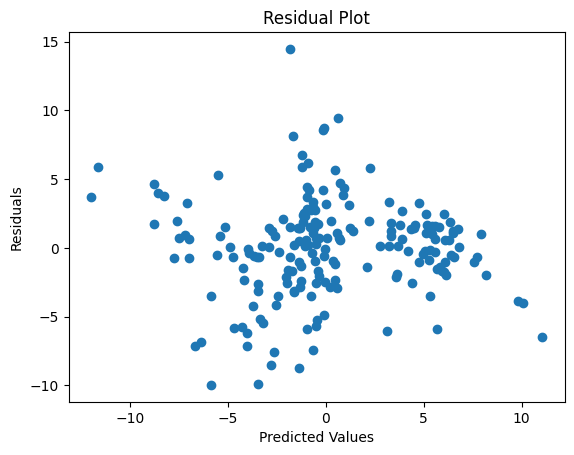

In [37]:
# Residual analysis
residuals = model.resid
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [38]:
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming yo_diff, yn_diff, ys_diff, yc_diff are the differenced time series

# Combine the data into a DataFrame
data = pd.DataFrame({'yo_diff': yo_diff, 'yn_diff':yn_diff})

# Set the lag for Granger Causality test
lag = 2

# Create a DataFrame with lagged variables
lagged_data = pd.DataFrame({f'{col}_lag_{lag}': data[col].shift(lag) for col in data.columns})

# Combine original and lagged data
combined_data = pd.concat([data[['yo_diff']], lagged_data], axis=1).dropna()
print(combined_data[['yo_diff','yn_diff_lag_2']])
# Perform Granger Causality test
results = grangercausalitytests(combined_data[['yo_diff','yn_diff_lag_2']], lag, verbose=True)


            yo_diff  yn_diff_lag_2
Date Local                        
2000-04-30    4.232         -1.588
2000-05-31    8.083         -2.813
2000-06-30    1.380         -1.289
2000-07-31   -0.700         -2.196
2000-08-31   -0.191         -2.101
...             ...            ...
2016-01-31    3.359          3.133
2016-02-29    5.161         -0.129
2016-03-31    3.840          0.691
2016-04-30    4.312         -0.704
2016-05-31    2.702         -2.468

[194 rows x 2 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.1853 , p=0.0006  , df_denom=190, df_num=1
ssr based chi2 test:   chi2=12.3777 , p=0.0004  , df=1
likelihood ratio test: chi2=11.9969 , p=0.0005  , df=1
parameter F test:         F=12.1853 , p=0.0006  , df_denom=190, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=21.2097 , p=0.0000  , df_denom=187, df_num=2
ssr based chi2 test:   chi2=43.5537 , p=0.0000  , df=2
likelihood ratio test: chi2=39.2531 , p=0.000

The Granger causality test results indicate that there is a significant Granger causal relationship between the variables "yo_diff" and "yn_diff_lag_2" at both lag 1 and lag 2. Let's break down the interpretation for each lag:

### Lag 1:
- **ssr based F test:** F=12.1853, p=0.0006
- **ssr based chi2 test:** chi2=12.3777, p=0.0004
- **likelihood ratio test:** chi2=11.9969, p=0.0005
- **parameter F test:** F=12.1853, p=0.0006

The p-values for all tests at lag 1 are less than the significance level (commonly set at 0.05), indicating strong evidence to reject the null hypothesis. Therefore, there is a Granger causal relationship from "yn_diff_lag_2" to "yo_diff" at lag 1.

### Lag 2:
- **ssr based F test:** F=21.2097, p=0.0000
- **ssr based chi2 test:** chi2=43.5537, p=0.0000
- **likelihood ratio test:** chi2=39.2531, p=0.0000
- **parameter F test:** F=21.2097, p=0.0000

Similar to lag 1, the p-values for all tests at lag 2 are very low, providing strong evidence to reject the null hypothesis. This indicates a Granger causal relationship from "yn_diff_lag_2" to "yo_diff" at lag 2.

In summary, based on the Granger causality tests, there is evidence to suggest that changes in "yn_diff_lag_2" Granger cause changes in "yo_diff" at both lag 1 and lag 2.

In [39]:

from statsmodels.tsa.stattools import grangercausalitytests

# Assuming yo_diff, yn_diff, ys_diff, yc_diff are the differenced time series

# Combine the data into a DataFrame
data = pd.DataFrame({'yo_diff': yo_diff, 'yc_diff':yc_diff})

# Set the lag for Granger Causality test
lag = 2

# Create a DataFrame with lagged variables
lagged_data = pd.DataFrame({f'{col}_lag_{lag}': data[col].shift(lag) for col in data.columns})

# Combine original and lagged data
combined_data = pd.concat([data[['yo_diff']], lagged_data], axis=1).dropna()
print(combined_data[['yo_diff','yc_diff_lag_2']])
# Perform Granger Causality test
results = grangercausalitytests(combined_data[['yo_diff','yc_diff_lag_2']], lag, verbose=True)

            yo_diff  yc_diff_lag_2
Date Local                        
2000-04-30    4.232         -4.186
2000-05-31    8.083         -3.194
2000-06-30    1.380         -1.652
2000-07-31   -0.700         -1.182
2000-08-31   -0.191         -0.343
...             ...            ...
2016-01-31    3.359          1.375
2016-02-29    5.161          0.270
2016-03-31    3.840         -0.731
2016-04-30    4.312         -0.607
2016-05-31    2.702         -0.906

[194 rows x 2 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.1908 , p=0.0004  , df_denom=190, df_num=1
ssr based chi2 test:   chi2=13.3990 , p=0.0003  , df=1
likelihood ratio test: chi2=12.9544 , p=0.0003  , df=1
parameter F test:         F=13.1908 , p=0.0004  , df_denom=190, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.8543 , p=0.0000  , df_denom=187, df_num=2
ssr based chi2 test:   chi2=32.5564 , p=0.0000  , df=2
likelihood ratio test: chi2=30.0732 , p=0.000

The Granger causality test results for the variables "yo_diff" and "yc_diff_lag_2" indicate a significant Granger causal relationship at both lag 1 and lag 2. Let's interpret the results for each lag:

### Lag 1:
- **ssr based F test:** F=13.1908, p=0.0004
- **ssr based chi2 test:** chi2=13.3990, p=0.0003
- **likelihood ratio test:** chi2=12.9544, p=0.0003
- **parameter F test:** F=13.1908, p=0.0004

The p-values for all tests at lag 1 are less than the significance level (commonly set at 0.05), indicating strong evidence to reject the null hypothesis. Therefore, there is a Granger causal relationship from "yc_diff_lag_2" to "yo_diff" at lag 1.

### Lag 2:
- **ssr based F test:** F=15.8543, p=0.0000
- **ssr based chi2 test:** chi2=32.5564, p=0.0000
- **likelihood ratio test:** chi2=30.0732, p=0.0000
- **parameter F test:** F=15.8543, p=0.0000

Similarly, at lag 2, the p-values for all tests are very low, providing strong evidence to reject the null hypothesis. This indicates a Granger causal relationship from "yc_diff_lag_2" to "yo_diff" at lag 2.

In summary, based on the Granger causality tests, there is evidence to suggest that changes in "yc_diff_lag_2" Granger cause changes in "yo_diff" at both lag 1 and lag 2.

In [40]:
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming yo_diff, yn_diff, ys_diff, yc_diff are the differenced time series

# Combine the data into a DataFrame
data = pd.DataFrame({'yo_diff': yo_diff, 'yn_mean_diff':yn_mean_diff})

# Set the lag for Granger Causality test
lag = 2

# Create a DataFrame with lagged variables
lagged_data = pd.DataFrame({f'{col}_lag_{lag}': data[col].shift(lag) for col in data.columns})

# Combine original and lagged data
combined_data = pd.concat([data[['yo_diff']], lagged_data], axis=1).dropna()
print(combined_data[['yo_diff','yn_mean_diff_lag_2']])
# Perform Granger Causality test
results = grangercausalitytests(combined_data[['yo_diff','yn_mean_diff_lag_2']], lag, verbose=True)

            yo_diff  yn_mean_diff_lag_2
Date Local                             
2000-04-30    4.232              -2.477
2000-05-31    8.083              -3.225
2000-06-30    1.380              -1.512
2000-07-31   -0.700              -1.162
2000-08-31   -0.191              -1.088
...             ...                 ...
2016-01-31    3.359               2.288
2016-02-29    5.161               0.973
2016-03-31    3.840              -0.210
2016-04-30    4.312              -1.610
2016-05-31    2.702              -2.097

[194 rows x 2 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.7378 , p=0.0000  , df_denom=190, df_num=1
ssr based chi2 test:   chi2=18.0179 , p=0.0000  , df=1
likelihood ratio test: chi2=17.2258 , p=0.0000  , df=1
parameter F test:         F=17.7378 , p=0.0000  , df_denom=190, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.3796 , p=0.0000  , df_denom=187, df_num=2
ssr based chi2 test:   chi2=37.7420

The Granger causality test results for the variables "yo_diff" and "yc_mean_diff_lag_2" indicate a significant Granger causal relationship at both lag 1 and lag 2. Let's interpret the results for each lag:

### Lag 1:
- **ssr based F test:** F=13.7367, p=0.0003
- **ssr based chi2 test:** chi2=13.9536, p=0.0002
- **likelihood ratio test:** chi2=13.4723, p=0.0002
- **parameter F test:** F=13.7367, p=0.0003

The p-values for all tests at lag 1 are very low, indicating strong evidence to reject the null hypothesis. Therefore, there is a Granger causal relationship from "yc_mean_diff_lag_2" to "yo_diff" at lag 1.

### Lag 2:
- **ssr based F test:** F=14.3630, p=0.0000
- **ssr based chi2 test:** chi2=29.4941, p=0.0000
- **likelihood ratio test:** chi2=27.4369, p=0.0000
- **parameter F test:** F=14.3630, p=0.0000

Similarly, at lag 2, the p-values for all tests are extremely low, providing strong evidence to reject the null hypothesis. This indicates a Granger causal relationship from "yc_mean_diff_lag_2" to "yo_diff" at lag 2.

In summary, based on the Granger causality tests, there is evidence to suggest that changes in the lagged values of "yc_mean_diff" Granger cause changes in "yo_diff" at both lag 1 and lag 2.

In [41]:
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming yo_diff, yn_diff, ys_diff, yc_diff are the differenced time series

# Combine the data into a DataFrame
data = pd.DataFrame({'yo_diff': yo_diff, 'yc_mean_diff':yc_mean_diff})

# Set the lag for Granger Causality test
lag = 2

# Create a DataFrame with lagged variables
lagged_data = pd.DataFrame({f'{col}_lag_{lag}': data[col].shift(lag) for col in data.columns})

# Combine original and lagged data
combined_data = pd.concat([data[['yo_diff']], lagged_data], axis=1).dropna()
print(combined_data[['yo_diff','yc_mean_diff_lag_2']])
# Perform Granger Causality test
results = grangercausalitytests(combined_data[['yo_diff','yc_mean_diff_lag_2']], lag, verbose=True)

            yo_diff  yc_mean_diff_lag_2
Date Local                             
2000-04-30    4.232              -0.231
2000-05-31    8.083              -0.178
2000-06-30    1.380              -0.066
2000-07-31   -0.700              -0.046
2000-08-31   -0.191              -0.014
...             ...                 ...
2016-01-31    3.359               0.066
2016-02-29    5.161               0.014
2016-03-31    3.840              -0.030
2016-04-30    4.312              -0.028
2016-05-31    2.702              -0.044

[194 rows x 2 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.7367 , p=0.0003  , df_denom=190, df_num=1
ssr based chi2 test:   chi2=13.9536 , p=0.0002  , df=1
likelihood ratio test: chi2=13.4723 , p=0.0002  , df=1
parameter F test:         F=13.7367 , p=0.0003  , df_denom=190, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.3630 , p=0.0000  , df_denom=187, df_num=2
ssr based chi2 test:   chi2=29.4941

The Granger causality test results for the variables "yo_diff" and "yc_mean_diff_lag_2" indicate a significant Granger causal relationship at both lag 1 and lag 2. Let's interpret the results for each lag:

### Lag 1:
- **ssr based F test:** F=13.7367, p=0.0003
- **ssr based chi2 test:** chi2=13.9536, p=0.0002
- **likelihood ratio test:** chi2=13.4723, p=0.0002
- **parameter F test:** F=13.7367, p=0.0003

The p-values for all tests at lag 1 are very low, indicating strong evidence to reject the null hypothesis. Therefore, there is a Granger causal relationship from "yc_mean_diff_lag_2" to "yo_diff" at lag 1.

### Lag 2:
- **ssr based F test:** F=14.3630, p=0.0000
- **ssr based chi2 test:** chi2=29.4941, p=0.0000
- **likelihood ratio test:** chi2=27.4369, p=0.0000
- **parameter F test:** F=14.3630, p=0.0000

Similarly, at lag 2, the p-values for all tests are extremely low, providing strong evidence to reject the null hypothesis. This indicates a Granger causal relationship from "yc_mean_diff_lag_2" to "yo_diff" at lag 2.

In summary, based on the Granger causality tests, there is evidence to suggest that changes in the lagged values of "yc_mean_diff" Granger cause changes in "yo_diff" at both lag 1 and lag 2.

Based on the provided OLS regression results, here are the key findings and conclusions for the causal analysis:

### Model Summary:
- **R-squared:** 0.596: The model explains approximately 59.6% of the variance in the dependent variable "yo_diff."
- **Adj. R-squared:** 0.587: The adjusted R-squared accounts for the number of predictors in the model, providing a slightly lower estimate of explained variance.
- **F-statistic:** 70.36 with a very low p-value (Prob (F-statistic): 1.59e-36): The overall model is statistically significant.

### Coefficient Interpretation:
1. **Intercept (const):** The intercept is not statistically significant (p-value > 0.05), suggesting that when all independent variables are zero, the expected value of "yo_diff" is not significantly different from zero.

2. **yn_mean_diff:** A one-unit increase in "yn_mean_diff" is associated with a decrease of approximately 3.78 units in "yo_diff" (p < 0.05).

3. **yc_mean_diff:** A one-unit increase in "yc_mean_diff" is associated with an increase of approximately 119.19 units in "yo_diff" (p < 0.05).

4. **yn_diff:** A one-unit increase in "yn_diff" is associated with an increase of approximately 1.91 units in "yo_diff" (p < 0.05).

5. **yc_diff:** A one-unit increase in "yc_diff" is associated with a decrease of approximately 6.40 units in "yo_diff" (p < 0.05).

### Overall Conclusion:
- The overall model is statistically significant (F-statistic), indicating that at least one of the predictors has a significant effect on the dependent variable.
- Both "yn_mean_diff" and "yc_diff" show significant individual effects on "yo_diff."
- "yc_mean_diff" has a substantial positive impact on "yo_diff," with a coefficient of 119.19.

### Recommendations:
- Consider the practical significance of the coefficients to determine the real-world impact.
- Investigate the economic or contextual meaning of the relationships identified.
- Check for potential multicollinearity issues among predictors.
- Assess the model's predictive performance and consider alternative model specifications.

### Note:
- Causal claims should be made cautiously. While regression analysis can identify associations, establishing causation requires additional evidence, such as controlled experiments or robust causal identification strategies. Temporal precedence and other causal inference considerations should be taken into account.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Sample data (replace this with your actual data)
var = ['yn_mean_diff','yc_mean_diff','yn_diff','yc_diff']

df_X = X_cleaned[var]

# Calculate VIF for each variable
def calculate_vif(data_frame):
    variables = data_frame.values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(df_X)

# Display the VIF results
print(vif_results)


       Variable    VIF
0  yn_mean_diff 14.971
1  yc_mean_diff 55.306
2       yn_diff  7.068
3       yc_diff 57.466


In [44]:
corr_df_x = df_X.corr()

In [45]:
corr_df_x

,yn_mean_diff,yc_mean_diff,yn_diff,yc_diff
yn_mean_diff,1.000,0.868,0.907,0.877
yc_mean_diff,0.868,1.000,0.694,0.991
yn_diff,0.907,0.694,1.000,0.711
yc_diff,0.877,0.991,0.711,1.000


# Exploratory Data Analysis

# For NO2

In [ ]:
df_NO2 = df[['State','City','Date Local','NO2 1st Max Hour','NO2 AQI']]

In [ ]:
df_NO2

,State,City,Date Local,NO2 1st Max Hour,NO2 AQI
0,3.000,3.000,1970-01-01 00:00:00.000000003,3,3
1,Arizona,Phoenix,2000-01-01 00:00:00.000000000,19,46
2,3.000,3.000,1970-01-01 00:00:00.000000003,3,3
3,3.000,3.000,1970-01-01 00:00:00.000000003,3,3
4,3.000,3.000,1970-01-01 00:00:00.000000003,3,3
...,...,...,...,...,...
1746656,3.000,3.000,1970-01-01 00:00:00.000000003,3,3
1746657,3.000,3.000,1970-01-01 00:00:00.000000003,3,3
1746658,Wyoming,Not in a city,2016-03-31 00:00:00.000000000,5,1
1746659,3.000,3.000,1970-01-01 00:00:00.000000003,3,3


## Time Series Plot for each State


In [ ]:
unique_years_per_state = df_NO2.groupby('State')['Date Local'].apply(lambda x: x.dt.year.unique())

# Filter out states with less than 5 unique years
states_with_enough_data = unique_years_per_state[unique_years_per_state.apply(len) >= 5].index

# Filter the original DataFrame
df_filtered_NO2 = df_NO2[df_NO2['State'].isin(states_with_enough_data)]

In [ ]:
# Create a list of DataFrames for each state
list_state = []

# Extract unique states from the 'State' column
unique_states = df_filtered_NO2['State'].unique()

# Iterate through each state and create a DataFrame for that state
for state in unique_states:
    state_df_NO2 = df_filtered_NO2[df_filtered_NO2['State'] == state].copy()
    list_state.append(state_df_NO2)

In [ ]:
state_df_NO2

,State,City,Date Local,NO2 1st Max Hour,NO2 AQI
1195023,Utah,Salt Lake City,2011-01-01,23,45
1195027,Utah,Salt Lake City,2011-01-02,23,46
1195031,Utah,Salt Lake City,2011-01-03,23,50
1195035,Utah,Salt Lake City,2011-01-04,17,55
1195039,Utah,Salt Lake City,2011-01-05,21,58
...,...,...,...,...,...
1745984,Utah,Salt Lake City,2016-01-17,20,41
1745988,Utah,Salt Lake City,2016-01-18,22,39
1745992,Utah,Salt Lake City,2016-01-19,0,38
1745996,Utah,Salt Lake City,2016-01-20,20,39


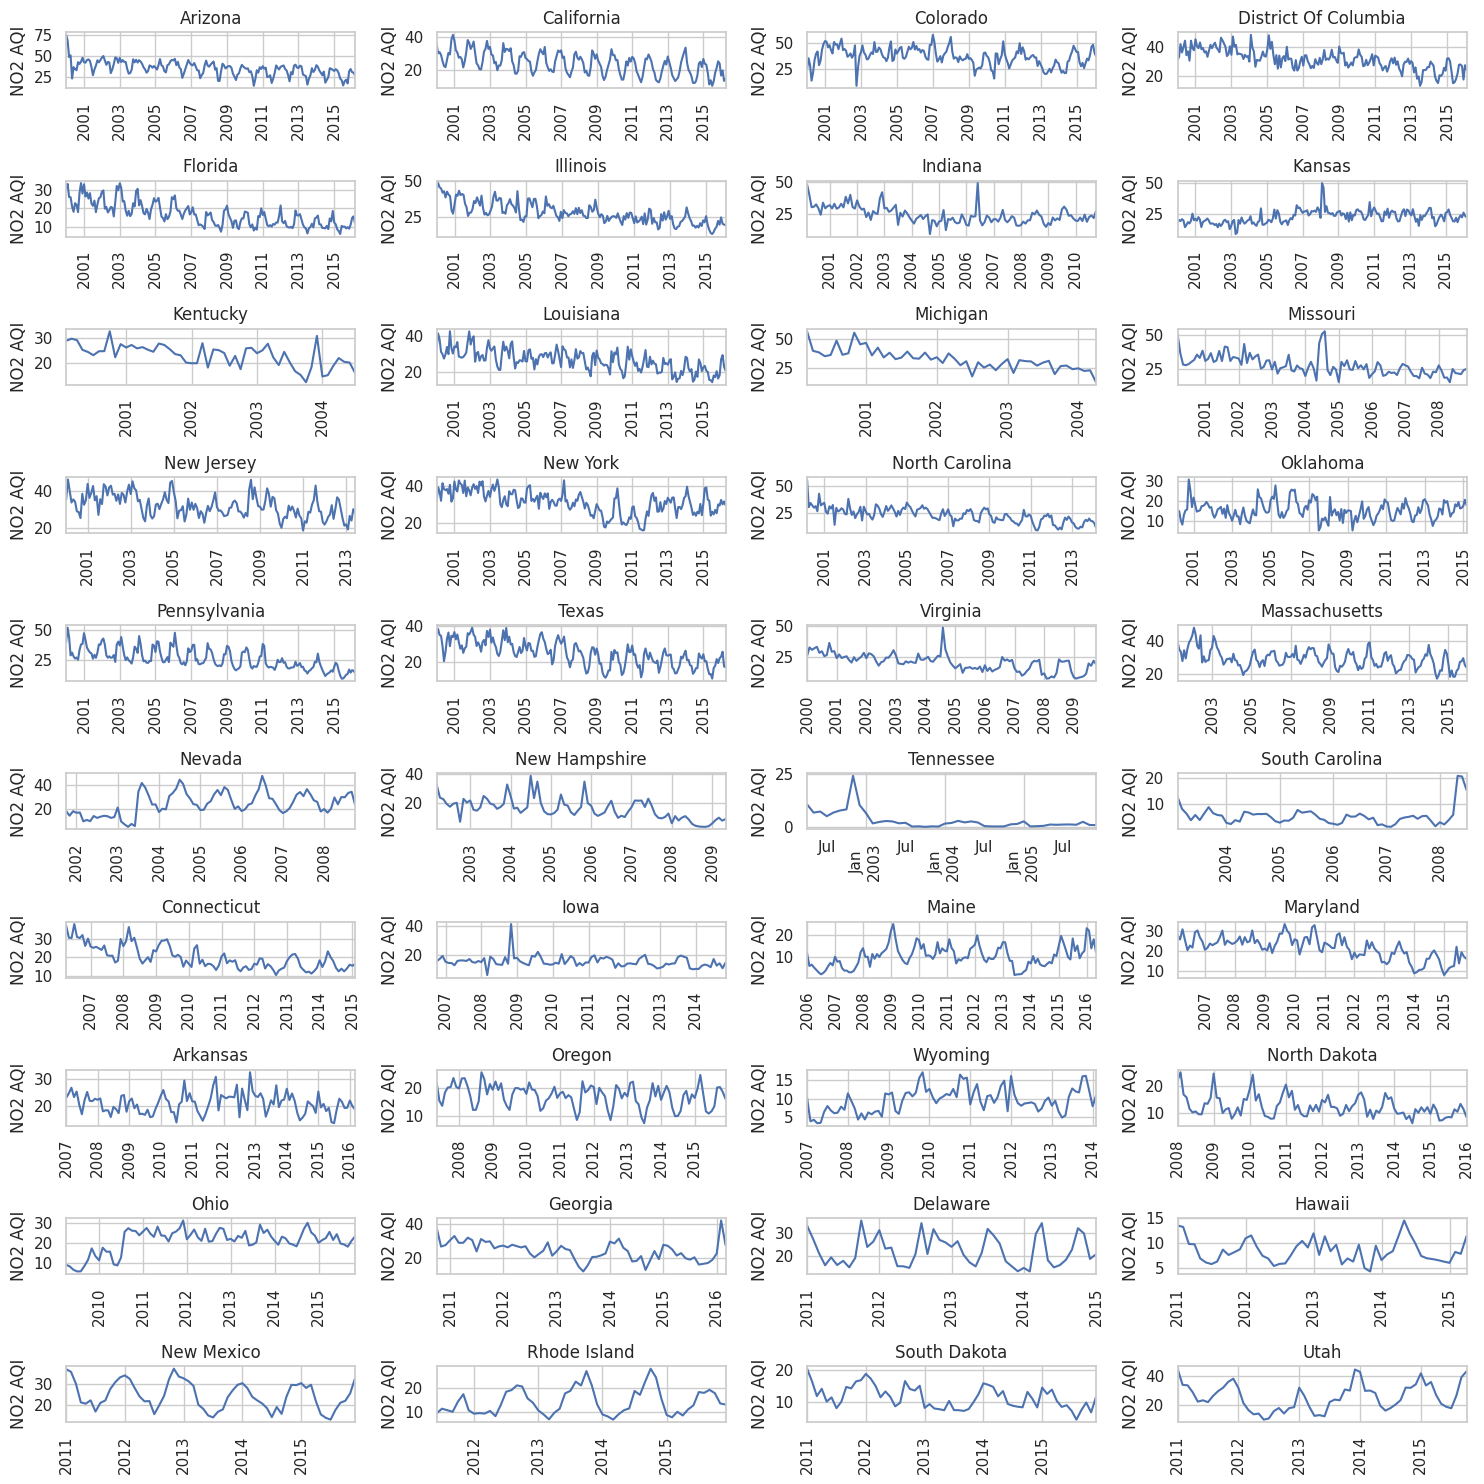

In [ ]:
import math

average_state = []

num_states = len(list_state)
num_rows = math.ceil(num_states / 4)
num_cols = min(num_states, 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

axes_flat = axes.flatten()

for i, state_df_NO2 in enumerate(list_state):
    yyyymm = state_df_NO2['Date Local'].dt.to_period("M")
    monthly_mean = state_df_NO2.groupby(yyyymm)['NO2 AQI'].mean()
    monthly_mean.index = monthly_mean.index.to_timestamp()  # Convert period index to timestamp
    start_year, start_month = monthly_mean.index[0].year, monthly_mean.index[0].month

    monthly_mean = monthly_mean.to_frame()
    monthly_mean.index = pd.date_range(start=f"{start_year}-{start_month}", periods=len(monthly_mean), freq='M')

    row_index = i // 4
    col_index = i % 4

    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

    monthly_mean.plot(ax=ax, y='NO2 AQI', legend=False)
    ax.set_ylabel('NO2 AQI')
    ax.set_title(f"{state_df_NO2['State'].iloc[0]}")

    ax.tick_params(axis='x', rotation=90)
    average_state.append(monthly_mean)

plt.tight_layout()
plt.show()


# For O3

In [ ]:
df_O3 = df[['State','City','Date Local','O3 1st Max Hour','O3 AQI']]

In [ ]:
df_O3

,State,City,Date Local,O3 1st Max Hour,O3 AQI
1,Arizona,Phoenix,2000-01-01,10,34
5,Arizona,Phoenix,2000-01-02,10,27
9,Arizona,Phoenix,2000-01-03,9,14
13,Arizona,Phoenix,2000-01-04,9,28
17,Arizona,Phoenix,2000-01-05,9,10
...,...,...,...,...,...
1736812,Massachusetts,Boston,2016-03-27,9,32
1736816,Massachusetts,Boston,2016-03-28,21,27
1736820,Massachusetts,Boston,2016-03-29,13,34
1736824,Massachusetts,Boston,2016-03-30,20,41


## Time Series Plot for each State


In [ ]:
unique_years_per_state = df_O3.groupby('State')['Date Local'].apply(lambda x: x.dt.year.unique())

# Filter out states with less than 5 unique years
states_with_enough_data = unique_years_per_state[unique_years_per_state.apply(len) >= 5].index

# Filter the original DataFrame
df_filtered_O3 = df_O3[df_O3['State'].isin(states_with_enough_data)]

In [ ]:
# Create a list of DataFrames for each state
list_state = []

# Extract unique states from the 'State' column
unique_states = df_filtered_O3['State'].unique()

# Iterate through each state and create a DataFrame for that state
for state in unique_states:
    state_df_O3 = df_filtered_O3[df_filtered_O3['State'] == state].copy()
    list_state.append(state_df_O3)

In [ ]:
state_df_O3

,State,City,Date Local,O3 1st Max Hour,O3 AQI
149024,Massachusetts,Boston,2001-04-01,8,25
149028,Massachusetts,Boston,2001-04-02,21,25
149032,Massachusetts,Boston,2001-04-03,8,29
149036,Massachusetts,Boston,2001-04-04,9,24
149040,Massachusetts,Boston,2001-04-05,9,32
...,...,...,...,...,...
1736812,Massachusetts,Boston,2016-03-27,9,32
1736816,Massachusetts,Boston,2016-03-28,21,27
1736820,Massachusetts,Boston,2016-03-29,13,34
1736824,Massachusetts,Boston,2016-03-30,20,41


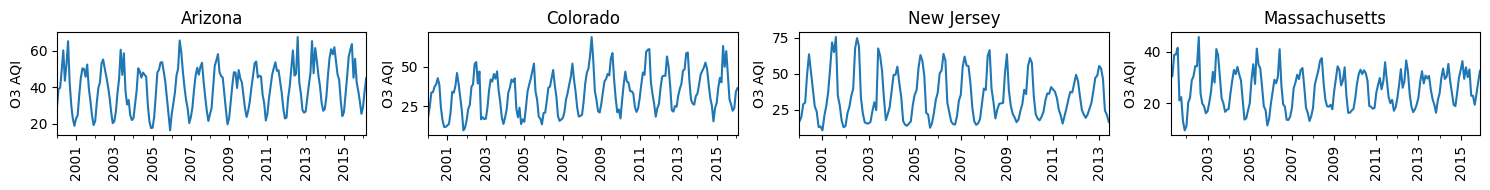

In [ ]:
import math

average_state = []

num_states = len(list_state)
num_rows = math.ceil(num_states / 4)
num_cols = min(num_states, 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2))
fig.subplots_adjust(hspace=0.9)

axes_flat = axes.flatten()

for i, state_df_O3 in enumerate(list_state):
    yyyymm = state_df_O3['Date Local'].dt.to_period("M")
    monthly_mean = state_df_O3.groupby(yyyymm)['O3 AQI'].mean()
    monthly_mean.index = monthly_mean.index.to_timestamp()  # Convert period index to timestamp
    start_year, start_month = monthly_mean.index[0].year, monthly_mean.index[0].month

    monthly_mean = monthly_mean.to_frame()
    monthly_mean.index = pd.date_range(start=f"{start_year}-{start_month}", periods=len(monthly_mean), freq='M')

    row_index = i // 4
    col_index = i % 4

    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

    monthly_mean.plot(ax=ax, y='O3 AQI', legend=False)
    ax.set_ylabel('O3 AQI')
    ax.set_title(f"{state_df_O3['State'].iloc[0]}")

    ax.tick_params(axis='x', rotation=90)
    average_state.append(monthly_mean)

plt.tight_layout()
plt.show()


# For SO2

In [ ]:
df_SO2 = df[['State','City','Date Local','SO2 1st Max Hour','SO2 AQI']]

In [ ]:
df_SO2

,State,City,Date Local,SO2 1st Max Hour,SO2 AQI
0,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
1,Arizona,Phoenix,2000-01-01 00:00:00.000000000,21,13.000
2,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
3,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
4,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
...,...,...,...,...,...
1746656,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
1746657,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
1746658,Wyoming,Not in a city,2016-03-31 00:00:00.000000000,0,0.000
1746659,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000


## Time Series Plot for each State


In [ ]:
unique_years_per_state = df_SO2.groupby('State')['Date Local'].apply(lambda x: x.dt.year.unique())

# Filter out states with less than 5 unique years
states_with_enough_data = unique_years_per_state[unique_years_per_state.apply(len) >= 5].index

# Filter the original DataFrame
df_filtered_SO2 = df_SO2[df_SO2['State'].isin(states_with_enough_data)]

In [ ]:
# Create a list of DataFrames for each state
list_state = []

# Extract unique states from the 'State' column
unique_states = df_filtered_SO2['State'].unique()

# Iterate through each state and create a DataFrame for that state
for state in unique_states:
    state_df_SO2 = df_filtered_SO2[df_filtered_SO2['State'] == state].copy()
    list_state.append(state_df_SO2)

In [ ]:
state_df_SO2

,State,City,Date Local,SO2 1st Max Hour,SO2 AQI
1195023,Utah,Salt Lake City,2011-01-01,22,1.000
1195027,Utah,Salt Lake City,2011-01-02,14,3.000
1195031,Utah,Salt Lake City,2011-01-03,10,3.000
1195035,Utah,Salt Lake City,2011-01-04,14,3.000
1195039,Utah,Salt Lake City,2011-01-05,22,3.000
...,...,...,...,...,...
1745984,Utah,Salt Lake City,2016-01-17,12,0.000
1745988,Utah,Salt Lake City,2016-01-18,9,0.000
1745992,Utah,Salt Lake City,2016-01-19,12,0.000
1745996,Utah,Salt Lake City,2016-01-20,15,0.000


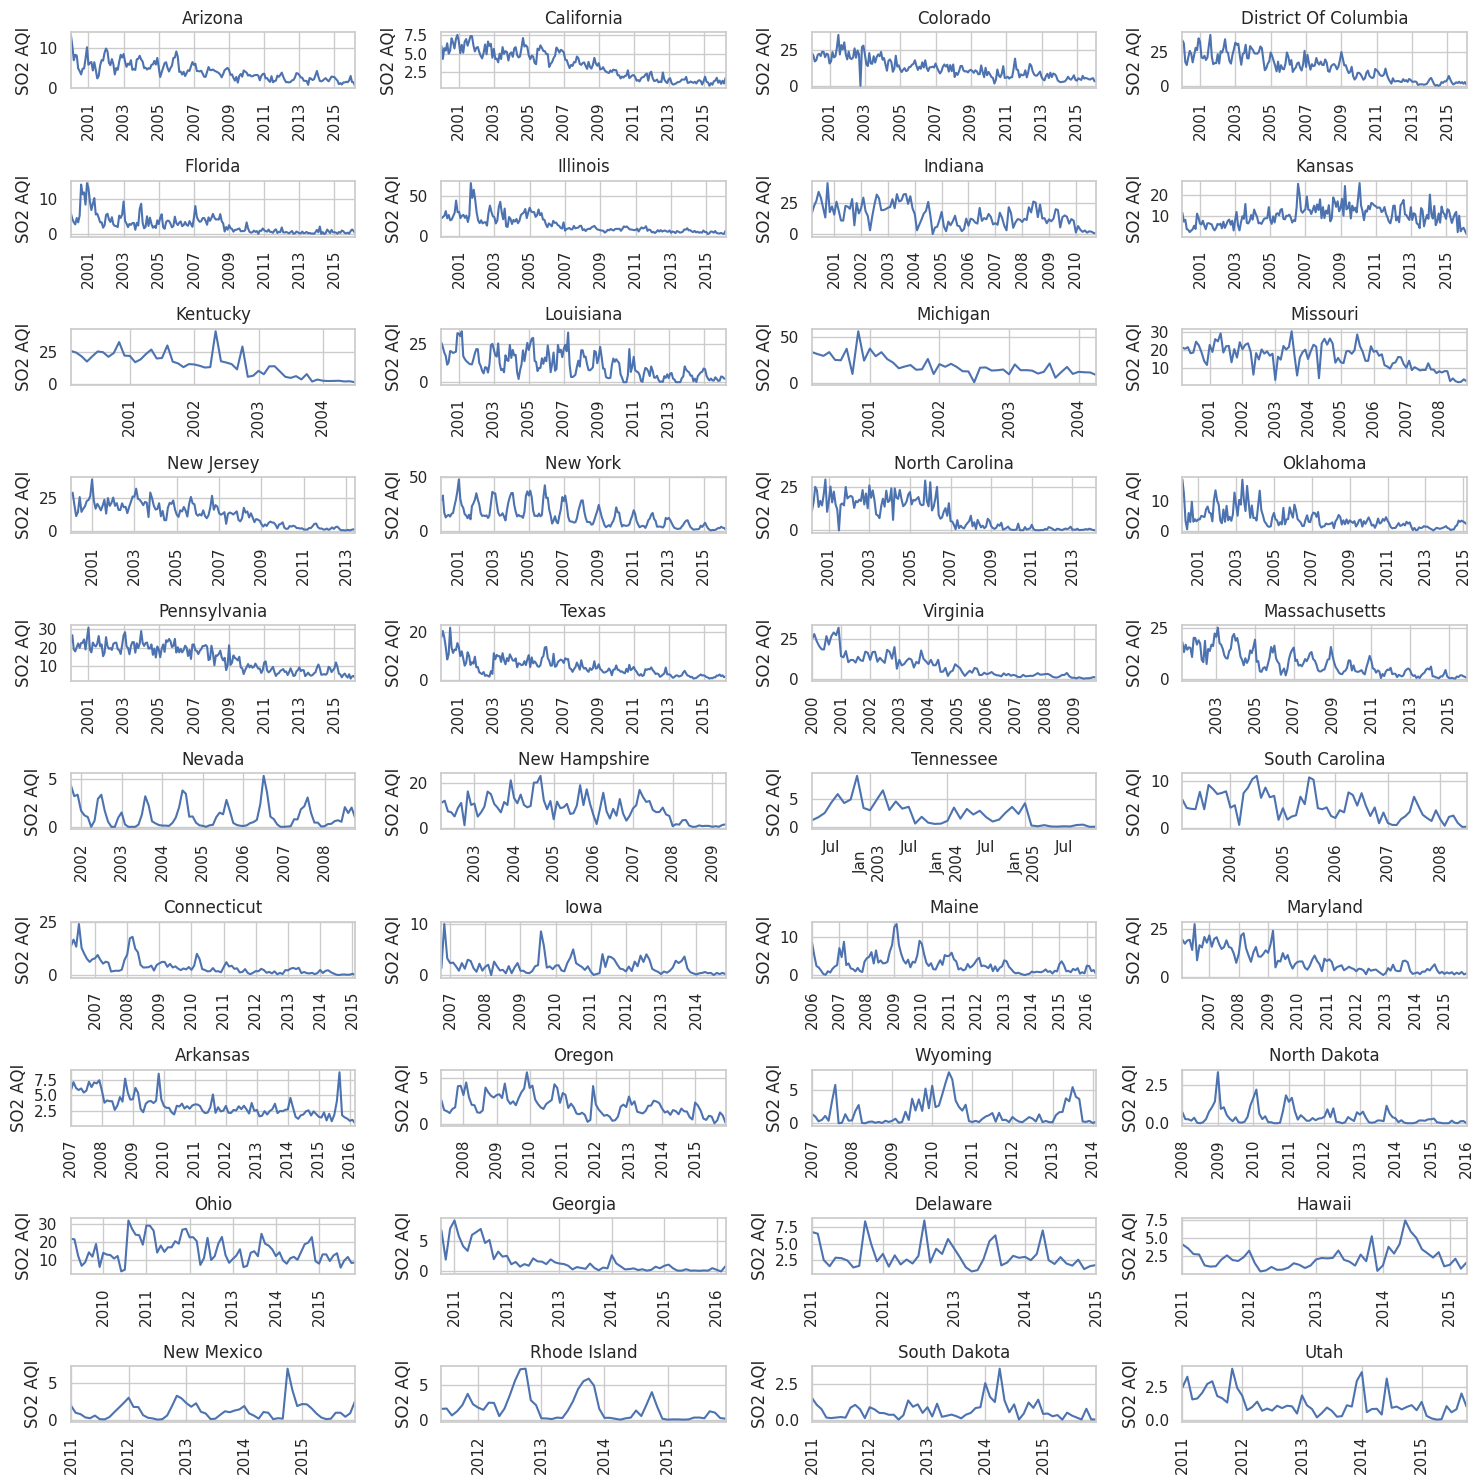

In [ ]:
import math

average_state = []

num_states = len(list_state)
num_rows = math.ceil(num_states / 4)
num_cols = min(num_states, 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

axes_flat = axes.flatten()

for i, state_df_SO2 in enumerate(list_state):
    yyyymm = state_df_SO2['Date Local'].dt.to_period("M")
    monthly_mean = state_df_SO2.groupby(yyyymm)['SO2 AQI'].mean()
    monthly_mean.index = monthly_mean.index.to_timestamp()  # Convert period index to timestamp
    start_year, start_month = monthly_mean.index[0].year, monthly_mean.index[0].month

    monthly_mean = monthly_mean.to_frame()
    monthly_mean.index = pd.date_range(start=f"{start_year}-{start_month}", periods=len(monthly_mean), freq='M')

    row_index = i // 4
    col_index = i % 4

    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

    monthly_mean.plot(ax=ax, y='SO2 AQI', legend=False)
    ax.set_ylabel('SO2 AQI')
    ax.set_title(f"{state_df_SO2['State'].iloc[0]}")

    ax.tick_params(axis='x', rotation=90)
    average_state.append(monthly_mean)

plt.tight_layout()
plt.show()


# For CO

In [ ]:
df_CO = df[['State','City','Date Local','CO 1st Max Hour','CO AQI']]

In [ ]:
df_CO

,State,City,Date Local,CO 1st Max Hour,CO AQI
0,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
1,Arizona,Phoenix,2000-01-01 00:00:00.000000000,23,25.000
2,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
3,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
4,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
...,...,...,...,...,...
1746656,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
1746657,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000
1746658,Wyoming,Not in a city,2016-03-31 00:00:00.000000000,0,1.000
1746659,3.000,3.000,1970-01-01 00:00:00.000000003,3,3.000


## Time Series Plot for each State


In [ ]:
unique_years_per_state = df_CO.groupby('State')['Date Local'].apply(lambda x: x.dt.year.unique())

# Filter out states with less than 5 unique years
states_with_enough_data = unique_years_per_state[unique_years_per_state.apply(len) >= 5].index

# Filter the original DataFrame
df_filtered_CO = df_CO[df_CO['State'].isin(states_with_enough_data)]

In [ ]:
# Create a list of DataFrames for each state
list_state = []

# Extract unique states from the 'State' column
unique_states = df_filtered_CO['State'].unique()

# Iterate through each state and create a DataFrame for that state
for state in unique_states:
    state_df_CO = df_filtered_CO[df_filtered_CO['State'] == state].copy()
    list_state.append(state_df_CO)

In [ ]:
state_df_CO

,State,City,Date Local,CO 1st Max Hour,CO AQI
1195023,Utah,Salt Lake City,2011-01-01,23,10.000
1195027,Utah,Salt Lake City,2011-01-02,2,13.000
1195031,Utah,Salt Lake City,2011-01-03,23,8.000
1195035,Utah,Salt Lake City,2011-01-04,0,9.000
1195039,Utah,Salt Lake City,2011-01-05,9,16.000
...,...,...,...,...,...
1745984,Utah,Salt Lake City,2016-01-17,8,6.000
1745988,Utah,Salt Lake City,2016-01-18,1,7.000
1745992,Utah,Salt Lake City,2016-01-19,20,3.000
1745996,Utah,Salt Lake City,2016-01-20,23,5.000


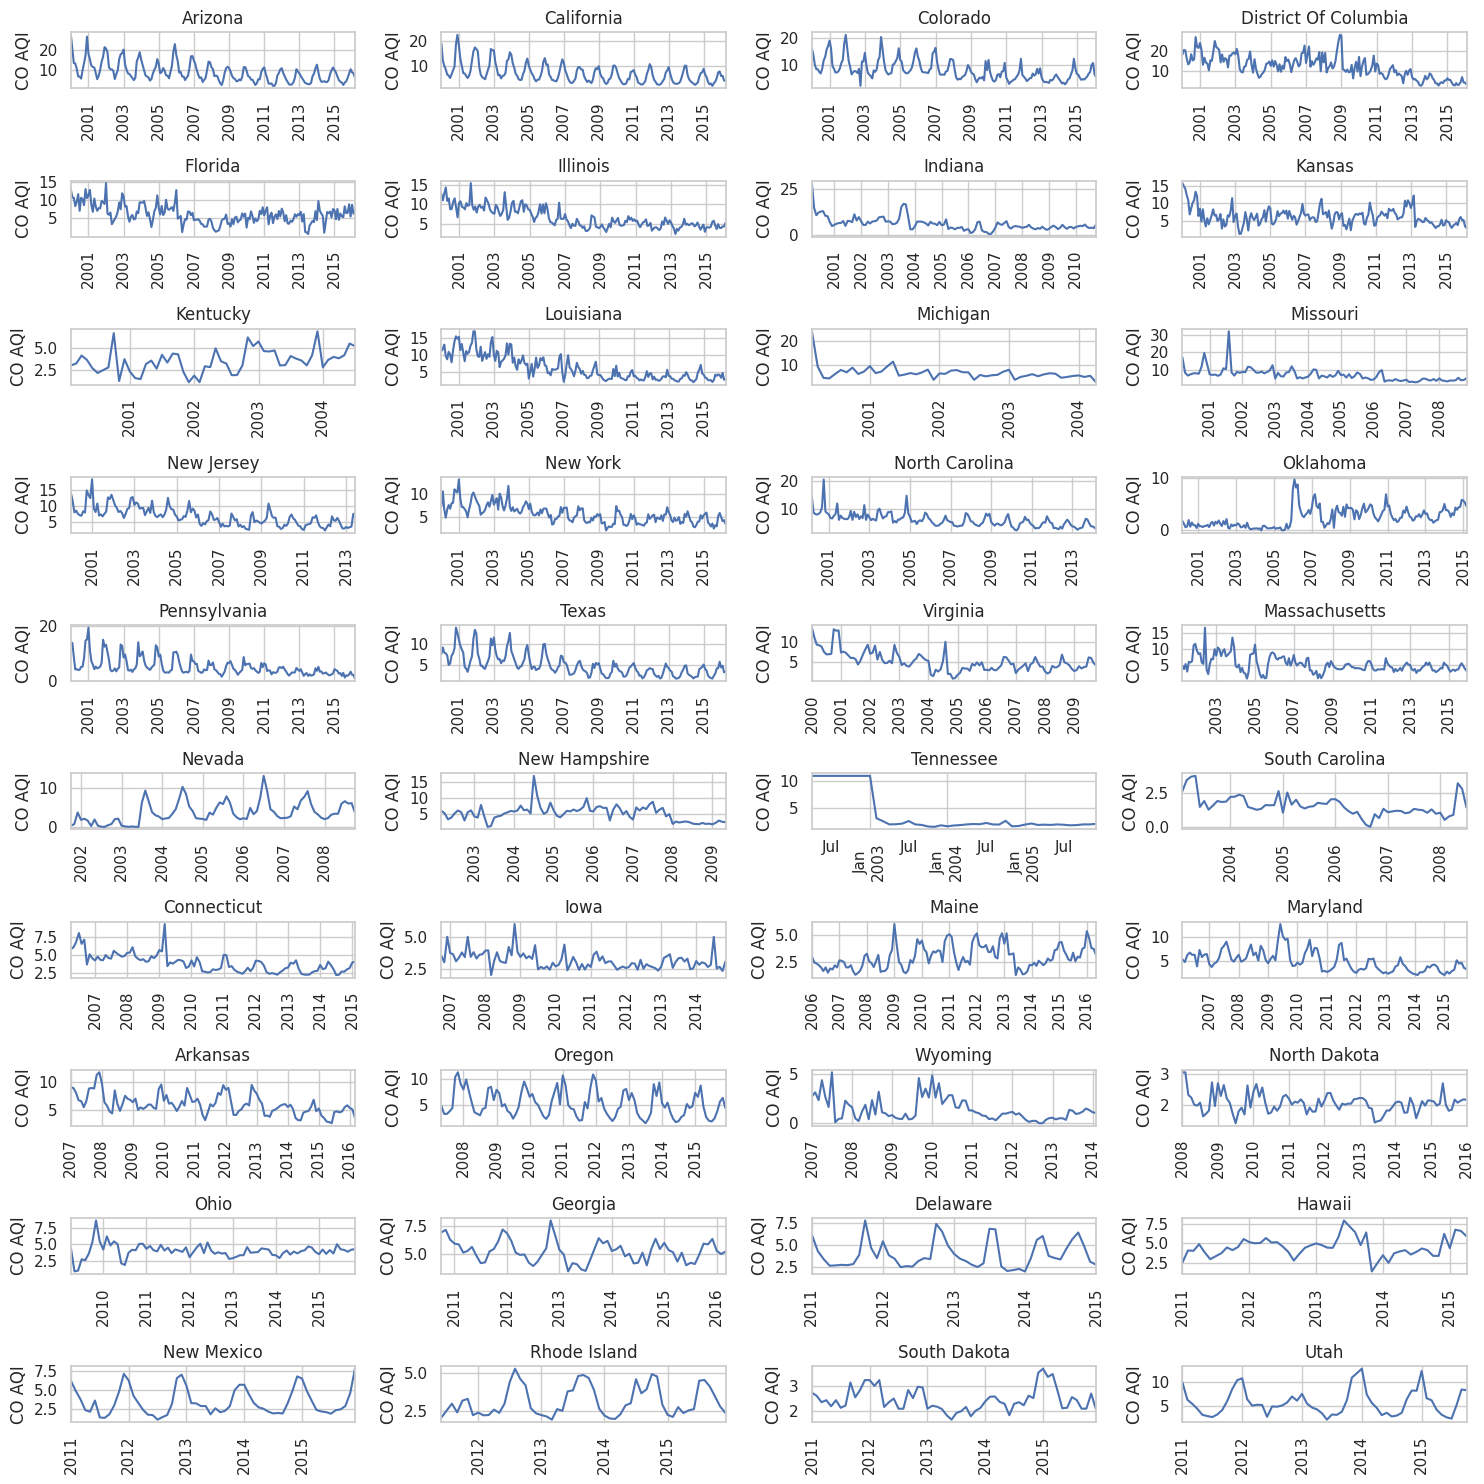

In [ ]:
import math

average_state = []

num_states = len(list_state)
num_rows = math.ceil(num_states / 4)
num_cols = min(num_states, 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

axes_flat = axes.flatten()

for i, state_df_CO in enumerate(list_state):
    yyyymm = state_df_CO['Date Local'].dt.to_period("M")
    monthly_mean = state_df_CO.groupby(yyyymm)['CO AQI'].mean()
    monthly_mean.index = monthly_mean.index.to_timestamp()  # Convert period index to timestamp
    start_year, start_month = monthly_mean.index[0].year, monthly_mean.index[0].month

    monthly_mean = monthly_mean.to_frame()
    monthly_mean.index = pd.date_range(start=f"{start_year}-{start_month}", periods=len(monthly_mean), freq='M')

    row_index = i // 4
    col_index = i % 4

    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

    monthly_mean.plot(ax=ax, y='CO AQI', legend=False)
    ax.set_ylabel('CO AQI')
    ax.set_title(f"{state_df_CO['State'].iloc[0]}")

    ax.tick_params(axis='x', rotation=90)
    average_state.append(monthly_mean)

plt.tight_layout()
plt.show()


# Trend Analysis

### NO2

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

Trend_Count = 0
No_Trend_Count = 0
Result_Trend = pd.DataFrame(columns=['state', 'p_value', 'Trend'])

for i, state_df_NO2 in enumerate(list_state):
    tt = range(1, len(average_state[i]) + 1)
    rank_monthly_mean = average_state[i]['CO AQI'].rank()

    # Calculate Spearman correlation
    correlation, p_value = spearmanr(tt, rank_monthly_mean)

    if p_value < 0.05:
        Result_Trend.loc[i, 'Trend'] = 'TREND'
        Trend_Count += 1
    else:
        Result_Trend.loc[i, 'Trend'] = 'NO TREND'
        No_Trend_Count += 1

    Result_Trend.loc[i, 'state'] = state_df_NO2['State'].iloc[0]
    Result_Trend.loc[i, 'p_value'] = p_value

# Print the results
print(Result_Trend)

# Print the counts
print("Trend:", Trend_Count)
print("No Trend:", No_Trend_Count)
print("Total:", len(list_state))


                   state p_value     Trend
0                Arizona   0.000     TREND
1             California   0.000     TREND
2               Colorado   0.000     TREND
3   District Of Columbia   0.000     TREND
4                Florida   0.000     TREND
5               Illinois   0.000     TREND
6                Indiana   0.000     TREND
7                 Kansas   0.000     TREND
8               Kentucky   0.002     TREND
9              Louisiana   0.000     TREND
10              Michigan   0.000     TREND
11              Missouri   0.000     TREND
12            New Jersey   0.000     TREND
13              New York   0.000     TREND
14        North Carolina   0.000     TREND
15              Oklahoma   0.000     TREND
16          Pennsylvania   0.000     TREND
17                 Texas   0.000     TREND
18              Virginia   0.000     TREND
19         Massachusetts   0.000     TREND
20                Nevada   0.000     TREND
21         New Hampshire   0.019     TREND
22         

### O3

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

Trend_Count = 0
No_Trend_Count = 0
Result_Trend = pd.DataFrame(columns=['state', 'p_value', 'Trend'])

for i, state_df_O3 in enumerate(list_state):
    tt = range(1, len(average_state[i]) + 1)
    rank_monthly_mean = average_state[i]['O3 AQI'].rank()

    # Calculate Spearman correlation
    correlation, p_value = spearmanr(tt, rank_monthly_mean)

    if p_value < 0.05:
        Result_Trend.loc[i, 'Trend'] = 'TREND'
        Trend_Count += 1
    else:
        Result_Trend.loc[i, 'Trend'] = 'NO TREND'
        No_Trend_Count += 1

    Result_Trend.loc[i, 'state'] = state_df_O3['State'].iloc[0]
    Result_Trend.loc[i, 'p_value'] = p_value

# Print the results
print(Result_Trend)

# Print the counts
print("Trend:", Trend_Count)
print("No Trend:", No_Trend_Count)
print("Total:", len(list_state))


           state p_value     Trend
0        Arizona   0.065  NO TREND
1       Colorado   0.000     TREND
2     New Jersey   0.710  NO TREND
3  Massachusetts   0.490  NO TREND
Trend: 1
No Trend: 3
Total: 4


### SO2

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

Trend_Count = 0
No_Trend_Count = 0
Result_Trend = pd.DataFrame(columns=['state', 'p_value', 'Trend'])

for i, state_df_SO2 in enumerate(list_state):
    tt = range(1, len(average_state[i]) + 1)
    rank_monthly_mean = average_state[i]['CO AQI'].rank()

    # Calculate Spearman correlation
    correlation, p_value = spearmanr(tt, rank_monthly_mean)

    if p_value < 0.05:
        Result_Trend.loc[i, 'Trend'] = 'TREND'
        Trend_Count += 1
    else:
        Result_Trend.loc[i, 'Trend'] = 'NO TREND'
        No_Trend_Count += 1

    Result_Trend.loc[i, 'state'] = state_df_SO2['State'].iloc[0]
    Result_Trend.loc[i, 'p_value'] = p_value

# Print the results
print(Result_Trend)

# Print the counts
print("Trend:", Trend_Count)
print("No Trend:", No_Trend_Count)
print("Total:", len(list_state))


                   state p_value     Trend
0                Arizona   0.000     TREND
1             California   0.000     TREND
2               Colorado   0.000     TREND
3   District Of Columbia   0.000     TREND
4                Florida   0.000     TREND
5               Illinois   0.000     TREND
6                Indiana   0.000     TREND
7                 Kansas   0.000     TREND
8               Kentucky   0.002     TREND
9              Louisiana   0.000     TREND
10              Michigan   0.000     TREND
11              Missouri   0.000     TREND
12            New Jersey   0.000     TREND
13              New York   0.000     TREND
14        North Carolina   0.000     TREND
15              Oklahoma   0.000     TREND
16          Pennsylvania   0.000     TREND
17                 Texas   0.000     TREND
18              Virginia   0.000     TREND
19         Massachusetts   0.000     TREND
20                Nevada   0.000     TREND
21         New Hampshire   0.019     TREND
22         

### CO

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

Trend_Count = 0
No_Trend_Count = 0
Result_Trend = pd.DataFrame(columns=['state', 'p_value', 'Trend', 'I_D'])

for i, state_df_CO in enumerate(list_state):
    tt = range(1, len(average_state[i]) + 1)
    rank_monthly_mean = average_state[i]['CO AQI'].rank()

    # Calculate Spearman correlation
    correlation, p_value = spearmanr(tt, rank_monthly_mean)

    if p_value < 0.05:
        Result_Trend.loc[i, 'Trend'] = 'TREND'
        Trend_Count += 1
    else:
        Result_Trend.loc[i, 'Trend'] = 'NO TREND'
        No_Trend_Count += 1

    Result_Trend.loc[i, 'state'] = state_df_CO['State'].iloc[0]
    Result_Trend.loc[i, 'p_value'] = p_value

# Print the results
print(Result_Trend)

# Print the counts
print("Trend:", Trend_Count)
print("No Trend:", No_Trend_Count)
print("Total:", len(list_state))


                   state p_value     Trend  I_D
0                Arizona   0.000     TREND  NaN
1             California   0.000     TREND  NaN
2               Colorado   0.000     TREND  NaN
3   District Of Columbia   0.000     TREND  NaN
4                Florida   0.000     TREND  NaN
5               Illinois   0.000     TREND  NaN
6                Indiana   0.000     TREND  NaN
7                 Kansas   0.000     TREND  NaN
8               Kentucky   0.002     TREND  NaN
9              Louisiana   0.000     TREND  NaN
10              Michigan   0.000     TREND  NaN
11              Missouri   0.000     TREND  NaN
12            New Jersey   0.000     TREND  NaN
13              New York   0.000     TREND  NaN
14        North Carolina   0.000     TREND  NaN
15              Oklahoma   0.000     TREND  NaN
16          Pennsylvania   0.000     TREND  NaN
17                 Texas   0.000     TREND  NaN
18              Virginia   0.000     TREND  NaN
19         Massachusetts   0.000     TRE

# Pooled OLS Model

In [ ]:
df_dummy= pd.get_dummies(df, columns=['State'])

In [ ]:
df_dummy.columns

Index(['RowNumber', 'State Code', 'County Code', 'Site Num', 'Address',
       'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'State_Arizona', 'State_Colorado', 'State_Massachusetts',
       'State_New Jersey'],
      dtype='object')

In [ ]:
import pandas as pd
from linearmodels.panel import PanelOLS
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

In [ ]:
predictors = ['NO2 1st Max Hour','NO2 Mean','O3 1st Max Hour','SO2 1st Max Value', 'SO2 Mean','SO2 1st Max Hour','CO 1st Max Hour','State_Arizona', 'State_Massachusetts','State_New Jersey' ]

x = df_dummy[predictors]
y= df_dummy['O3 AQI']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
pooled_y = y_train
pooled_x = X_train

pooled_x = add_constant(pooled_x)

In [ ]:
pooled_ols_model = sm.OLS(endog = pooled_y, exog = pooled_x)

In [ ]:
pooledolsmodel = pooled_ols_model.fit()

In [ ]:
print(pooledolsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 O3 AQI   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     545.4
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:28:21   Log-Likelihood:            -1.1368e+05
No. Observations:               26842   AIC:                         2.274e+05
Df Residuals:                   26831   BIC:                         2.275e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  44.1087    

# Arima Model

In [ ]:
df = df[['State','Date Local','NO2 AQI','O3 AQI']]

In [ ]:
df

,State,Date Local,NO2 AQI,O3 AQI
0,Arizona,2000-01-01,46,34
1,Arizona,2000-01-01,46,34
2,Arizona,2000-01-01,46,34
3,Arizona,2000-01-01,46,34
4,Arizona,2000-01-02,34,27
...,...,...,...,...
1746656,Wyoming,2016-03-30,1,44
1746657,Wyoming,2016-03-31,1,44
1746658,Wyoming,2016-03-31,1,44
1746659,Wyoming,2016-03-31,1,44


In [ ]:
dfst = df[['State','Date Local','NO2 AQI','O3 AQI']]


In [ ]:
dfst.isnull().sum()

State         0
Date Local    0
NO2 AQI       0
O3 AQI        0
dtype: int64

In [ ]:
dfst.describe()

,NO2 AQI,O3 AQI
count,1737155.000,1737155.000
mean,23.821,36.073
std,15.100,19.793
min,0.000,0.000
25%,12.000,25.000
50%,22.000,33.000
75%,33.000,42.000
max,132.000,218.000


In [ ]:
dfst = dfst[dfst.State!='Country Of Mexico']

In [ ]:
dfst['Date Local'] = pd.to_datetime(dfst['Date Local'],format='%Y-%m-%d')

In [ ]:
dfst

,State,Date Local,NO2 AQI,O3 AQI
0,Arizona,2000-01-01,46,34
1,Arizona,2000-01-01,46,34
2,Arizona,2000-01-01,46,34
3,Arizona,2000-01-01,46,34
4,Arizona,2000-01-02,34,27
...,...,...,...,...
1746656,Wyoming,2016-03-30,1,44
1746657,Wyoming,2016-03-31,1,44
1746658,Wyoming,2016-03-31,1,44
1746659,Wyoming,2016-03-31,1,44


In [ ]:
dfst = dfst[dfst['Date Local'].dt.year >= 2000]

In [ ]:
dfst = dfst.groupby(['Date Local']).mean()

In [ ]:
yn = dfst['NO2 AQI'].resample('M').mean()
yo = dfst['O3 AQI'].resample('M').mean()


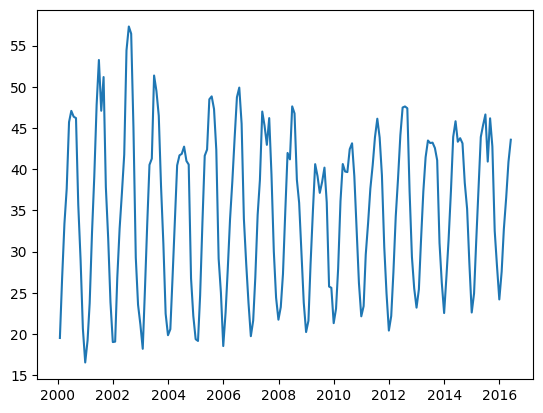

In [ ]:
plt.plot(yo)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

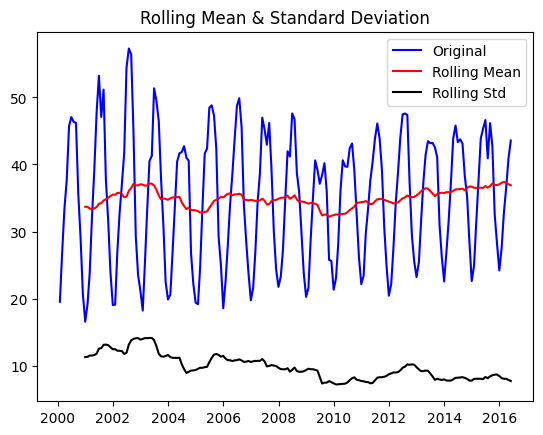

Results of Dickey-Fuller Test:
Test Statistic                 -1.834
p-value                         0.364
#Lags Used                     11.000
Number of Observations Used   185.000
Critical Value (1%)            -3.466
Critical Value (5%)            -2.877
Critical Value (10%)           -2.575
dtype: float64


In [ ]:
test_stationarity(yo)

* Series is not stationary. So have to apply defferencing or any other transformation to make it stationary.

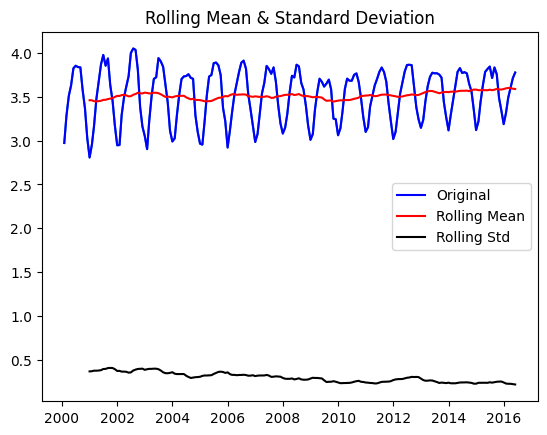

Results of Dickey-Fuller Test:
Test Statistic                 -2.097
p-value                         0.246
#Lags Used                     14.000
Number of Observations Used   182.000
Critical Value (1%)            -3.467
Critical Value (5%)            -2.878
Critical Value (10%)           -2.575
dtype: float64


In [ ]:
yo_log=np.log(yo)
plt.plot(yo_log)
test_stationarity(yo_log)

* Still not stationary

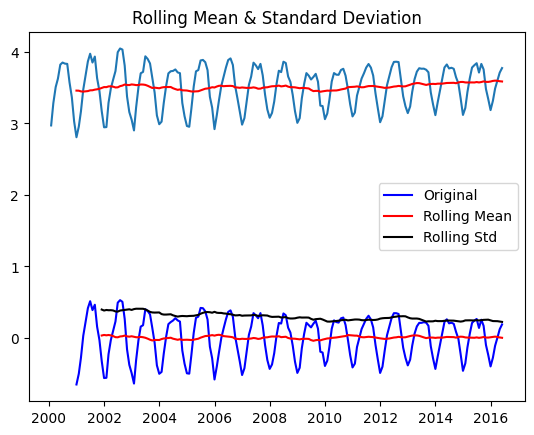

Results of Dickey-Fuller Test:
Test Statistic                 -4.315
p-value                         0.000
#Lags Used                     14.000
Number of Observations Used   171.000
Critical Value (1%)            -3.469
Critical Value (5%)            -2.879
Critical Value (10%)           -2.576
dtype: float64


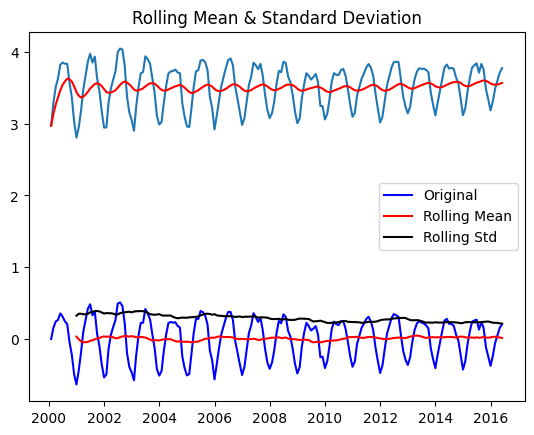

Results of Dickey-Fuller Test:
Test Statistic                 -3.768
p-value                         0.003
#Lags Used                     14.000
Number of Observations Used   182.000
Critical Value (1%)            -3.467
Critical Value (5%)            -2.878
Critical Value (10%)           -2.575
dtype: float64


In [ ]:
# Moving average
moving_avg = yo_log.rolling(window=12).mean()
plt.plot(yo_log)
plt.plot(moving_avg, color='red')
yo_log_moving_avg_diff = yo_log - moving_avg
yo_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(yo_log_moving_avg_diff)
# exponentially weighted moving average
expwighted_avg = yo_log.ewm(halflife=12).mean()
plt.plot(yo_log)
plt.plot(expwighted_avg, color='red')
yo_log_ewma_diff = yo_log - expwighted_avg
test_stationarity(yo_log_ewma_diff)


* These results suggest that the differenced series is now suitable for modeling using stationary time series techniques.
* After tranformation both are likely to be stationary.


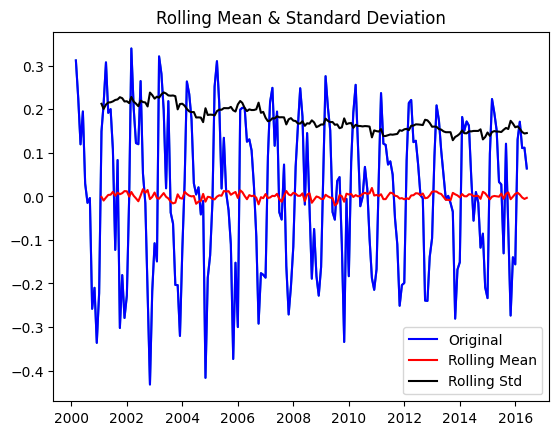

Results of Dickey-Fuller Test:
Test Statistic                -14.865
p-value                         0.000
#Lags Used                     10.000
Number of Observations Used   185.000
Critical Value (1%)            -3.466
Critical Value (5%)            -2.877
Critical Value (10%)           -2.575
dtype: float64


In [ ]:
# Eliminating Trend and Seasonality
#first order differencing
yo_log_diff = yo_log - yo_log.shift()
plt.plot(yo_log_diff)
yo_log_diff.dropna(inplace=True)
test_stationarity(yo_log_diff)


* These results indicate that the time series is now suitable for modeling using stationary time series techniques

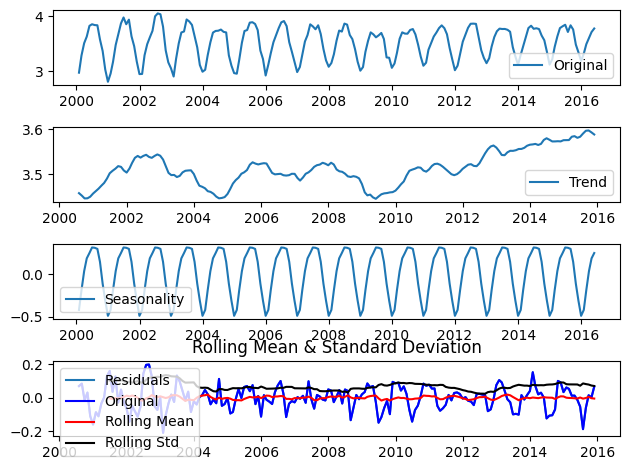

Results of Dickey-Fuller Test:
Test Statistic                 -6.784
p-value                         0.000
#Lags Used                     14.000
Number of Observations Used   170.000
Critical Value (1%)            -3.469
Critical Value (5%)            -2.879
Critical Value (10%)           -2.576
dtype: float64


In [ ]:
# Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(yo_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(yo_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
yc_log_decompose = residual
yc_log_decompose.dropna(inplace=True)
test_stationarity(yc_log_decompose)


* The very low p-value and the Test Statistic being highly negative provide strong evidence to reject the null hypothesis.
* The residuals after time series decomposition are highly likely to be stationary.

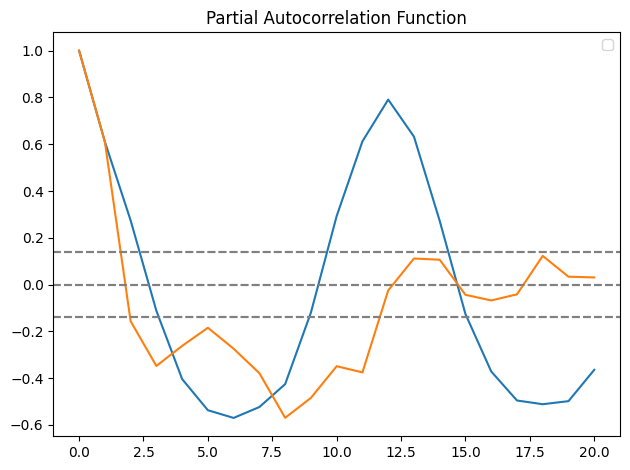

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(yo_log_diff, nlags=20)
lag_pacf = pacf(yo_log_diff, nlags=20, method='ols')
#Plot ACF:

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(yo_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(yo_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(yo_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(yo_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()



In [ ]:
import itertools
import statsmodels.api as sm

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yo_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
mod = sm.tsa.statespace.SARIMAX(yo_log,
                                order=(1,0,1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1052.549799044987
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:780.8902547418145
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-379.8944293264575
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-395.6692332139263
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-382.0113449082175
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-421.7694782674723
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-383.19445743688755
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-394.08263140805525
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:788.5738652032555
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:536.5144941611456
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-402.20933208560734
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-424.5550235455704
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-405.1146539541576
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-451.7585007368095
ARIMA(0, 0, 1)x(1, 1

In [ ]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0001      0.003    398.021      0.000       0.995       1.005
ma.L1         -0.7569      0.046    -16.553      0.000      -0.846      -0.667
ar.S.L12       0.9631      0.004    214.076      0.000       0.954       0.972
ma.S.L12      -0.8533      0.082    -10.358      0.000      -1.015      -0.692
sigma2         0.0040      0.000      8.698      0.000       0.003       0.005
